<a href="https://colab.research.google.com/github/geddadasaisuchendra/caluclator-App/blob/main/Restaurent_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TASK 1

In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [74]:
#Load the dataset
df = pd.read_csv("Dataset.csv")

In [75]:
#Get the column names
columns_list = df.columns.tolist()

In [76]:
#print the columns names
print("Columns in the dataset:")
print(columns_list)

Columns in the dataset:
['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


In [77]:
#print datatypes
print(df.dtypes)

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object


In [78]:
#Select relevant features and target variable
X = df.drop("Aggregate rating", axis=1)
y = df["Aggregate rating"]

In [79]:
#print non numeric values
non_numeric_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
print("Non-numeric columns:", non_numeric_columns)

Non-numeric columns: Index(['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose',
       'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery',
       'Is delivering now', 'Switch to order menu', 'Rating color',
       'Rating text'],
      dtype='object')


In [80]:
# Drop the 'Cuisines' column (if it is non-numeric and not used for prediction)
df = df.drop('Cuisines', axis=1)

In [81]:
#Encode categorical variables using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

In [82]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [83]:
#Train the Decision Tree Regression model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [84]:
#Make predictions on the testing data
y_pred = model.predict(X_test)

In [85]:
#Evaluate the model's performance using Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.0489586603872318
R-squared (R2): 0.9784901950672517


In [86]:
#Evaluate the model's performance using Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.0489586603872318
R-squared (R2): 0.9784901950672517


In [87]:
#Evaluate the model's performance using Mean Squared Error (MSE) and R-squared (R2)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.0489586603872318
R-squared (R2): 0.9784901950672517


In [88]:
#Analyze the most influential features affecting restaurant ratings (optional)
#Decision trees allow you to interpret feature importance easily. You can analyze the feature_importances_ attribute of the model.
importance = model.feature_importances_
feature_names = X_encoded.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
sorted_features = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nMost Influential Features:")
print(sorted_features)


Most Influential Features:
                                                 Feature    Importance
20825                              Rating text_Not rated  8.966539e-01
20819                                Rating color_Orange  5.152611e-02
20826                                   Rating text_Poor  2.219755e-02
20824                                   Rating text_Good  1.308405e-02
20818                                 Rating color_Green  2.579984e-03
...                                                  ...           ...
20103                           Cuisines_Japanese, Steak -1.008831e-19
3198      Restaurant Name_Jaco's Bayfront Bar and Grille -2.017661e-19
2700                   Restaurant Name_Grand Madras Cafe -2.017661e-19
15969  Address_Shop 8, Mount Kailash Market, East of ... -2.017661e-19
17659                                 Locality_Vikaspuri -1.614129e-18

[20828 rows x 2 columns]


TASK 2

In [89]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [90]:
#Load the dataset and handle missing values (if any)
df = pd.read_csv("Dataset.csv")


In [91]:
# Convert 'Cuisines' column to lowercase for case-insensitive matching
df['Cuisines'] = df['Cuisines'].str.lower()

In [92]:
# Encode categorical variables
le = LabelEncoder()
df['Cuisine_Encoded'] = le.fit_transform(df['Cuisines'])

In [93]:
# Define features and target variable
X = df[['Cuisine_Encoded']]
y = df['Aggregate rating']


In [94]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [95]:
# Implement Decision Tree Regressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [96]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [97]:
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


In [98]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 1.941493078539205
R-squared (R2): 0.1470122534531093


In [99]:
# Make a prediction for sample user preferences
sample_user_preferences = 'Italian, Chinese'  # Sample user preferences for cuisine
sample_user_preferences = sample_user_preferences.lower()
sample_user_pref_encoded = le.transform([sample_user_preferences])[0]

In [100]:
predicted_rating = model.predict([[sample_user_pref_encoded]])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [101]:
print(f"Predicted Rating for User Preferences: {sample_user_preferences}: {predicted_rating:.2f}")

Predicted Rating for User Preferences: italian, chinese: 0.00


TASK 3

In [102]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [103]:
# Generate a synthetic dataset for demonstration
np.random.seed(42)
num_samples = 1000
num_features = 5
X = np.random.randn(num_samples, num_features)
y = np.random.randint(2, size=num_samples)


In [104]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [105]:
# Initialize the logistic regression model
logistic_model = LogisticRegression()

In [106]:
# Train the model using the training data
logistic_model.fit(X_train, y_train)


LogisticRegression()

In [107]:
# Predict on the testing data
y_pred = logistic_model.predict(X_test)

In [108]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
confusion = confusion_matrix(y_test, y_pred)


In [109]:
# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", confusion)

Accuracy: 0.48
Precision: 0.47874188311688315
Recall: 0.48
F1-score: 0.47817103808662437
Confusion Matrix:
 [[41 57]
 [47 55]]


TASK 4

In [110]:
import pandas as pd
import folium
from folium import plugins

In [111]:
# Load the dataset
df = pd.read_csv("Dataset.csv")

In [112]:
# Step 2: Explore the latitude and longitude coordinates of the restaurants and visualize their distribution on a map
# Create a map centered at the mean latitude and longitude
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
map_restaurants = folium.Map(location=map_center, zoom_start=12)

In [113]:
# Add markers for each restaurant on the map
for index, row in df.iterrows():
    popup_text = f"Restaurant: {row['Restaurant Name']}<br>Location: {row['Locality']}, {row['City']}<br>Cuisines: {row['Cuisines']}<br>Rating: {row['Aggregate rating']}"
    folium.Marker([row['Latitude'], row['Longitude']], popup=popup_text).add_to(map_restaurants)

In [114]:
# Display the map
map_restaurants.save("restaurant_map.html")


In [115]:
# Step 3: Group the restaurants by city or locality and analyze the concentration of restaurants in different areas
# Group by city and count the number of restaurants in each city
restaurant_count_by_city = df.groupby('City').size().reset_index(name='Restaurant Count')


In [116]:
# Display the restaurant count by city
print(restaurant_count_by_city)

                City  Restaurant Count
0          Abu Dhabi                20
1               Agra                20
2          Ahmedabad                21
3             Albany                20
4          Allahabad                20
..               ...               ...
136          Weirton                 1
137  Wellington City                20
138   Winchester Bay                 1
139          Yorkton                 1
140        ��stanbul                14

[141 rows x 2 columns]


In [117]:
# Step 4: Calculate statistics such as the average ratings, cuisines, or price ranges by city or locality
# Group by city and calculate the average rating for each city
average_rating_by_city = df.groupby('City')['Aggregate rating'].mean().reset_index(name='Average Rating')


In [118]:
# Display the average rating by city
print(average_rating_by_city)

                City  Average Rating
0          Abu Dhabi        4.300000
1               Agra        3.965000
2          Ahmedabad        4.161905
3             Albany        3.555000
4          Allahabad        3.395000
..               ...             ...
136          Weirton        3.900000
137  Wellington City        4.250000
138   Winchester Bay        3.200000
139          Yorkton        3.300000
140        ��stanbul        4.292857

[141 rows x 2 columns]


In [119]:
# For example, you can use visualization libraries like seaborn to plot the distribution of ratings by city.
import seaborn as sns
import matplotlib.pyplot as plt

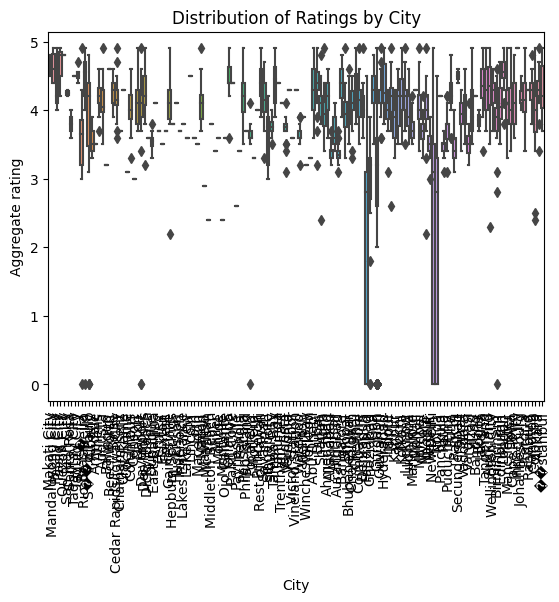

In [120]:
sns.boxplot(x='City', y='Aggregate rating', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Ratings by City')
plt.show()